In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
lp_train = pd.read_csv("/Users/keerthinandan/Documents/loan_prediction/train_ctrUa4K.csv") 
lp_test= pd.read_csv("/Users/keerthinandan/Documents/loan_prediction/test_lAUu6dG.csv")

In [4]:
data=pd.concat([lp_train,lp_test], ignore_index=True)

/Users/keerthinandan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


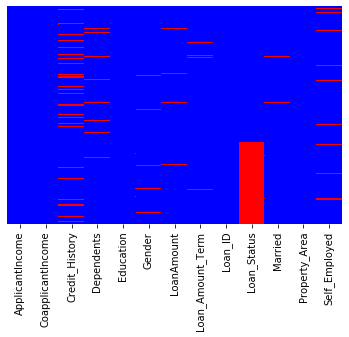

In [13]:
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'bwr')

In [4]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

In [14]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


In [6]:
lp_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
lp_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [16]:
data["LoanAmount"].fillna(data["LoanAmount"].mean(),inplace=True)

In [17]:
data["Credit_History"].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [18]:
data["Credit_History"].fillna(1,inplace=True)

In [19]:
data['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [20]:
data["Married"].fillna("Yes",inplace=True)

In [21]:
data["Loan_Amount_Term"].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [22]:
data["Loan_Amount_Term"].fillna(360,inplace=True)

In [23]:
data["Gender"].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [24]:
data["Gender"].fillna("Male",inplace=True)

In [25]:
data["Dependents"].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [26]:
data["Dependents"]=data["Dependents"].replace({'3+': 3})

In [27]:
data["Dependents"].fillna(0,inplace=True)

In [28]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         55
dtype: int64

In [66]:
data["Self_Employed"].value_counts()

No     862
Yes    119
Name: Self_Employed, dtype: int64

In [67]:
data["Self_Employed"].fillna("No",inplace=True)

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le=LabelEncoder()

In [70]:
data["Gender_n"]=le.fit_transform(data["Gender"])

In [71]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Credit_History_n,Education_n,Married_n,Property_Area_n,Self_Employed_n,Gender_n
0,5849,0.0,1.0,0,Graduate,Male,142.51153,360.0,LP001002,Y,No,Urban,No,1,0,0,2,0,1
1,4583,1508.0,1.0,1,Graduate,Male,128.00000,360.0,LP001003,N,Yes,Rural,No,1,0,1,0,0,1
2,3000,0.0,1.0,0,Graduate,Male,66.00000,360.0,LP001005,Y,Yes,Urban,Yes,1,0,1,2,1,1
3,2583,2358.0,1.0,0,Not Graduate,Male,120.00000,360.0,LP001006,Y,Yes,Urban,No,1,1,1,2,0,1
4,6000,0.0,1.0,0,Graduate,Male,141.00000,360.0,LP001008,Y,No,Urban,No,1,0,0,2,0,1


In [72]:
list(data)

['ApplicantIncome',
 'CoapplicantIncome',
 'Credit_History',
 'Dependents',
 'Education',
 'Gender',
 'LoanAmount',
 'Loan_Amount_Term',
 'Loan_ID',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Self_Employed',
 'Credit_History_n',
 'Education_n',
 'Married_n',
 'Property_Area_n',
 'Self_Employed_n',
 'Gender_n']

In [73]:
data["Credit_History_n"]=le.fit_transform(data["Credit_History"])

In [74]:
data["Education_n"]=le.fit_transform(data["Education"])

In [75]:
data["Married_n"]=le.fit_transform(data["Married"])

In [76]:
data["Property_Area_n"]=le.fit_transform(data["Property_Area"])

In [77]:
data["Self_Employed_n"]=le.fit_transform(data["Self_Employed"])

In [78]:
data=data.drop("Gender_n", axis=1)

In [79]:
data.rename(columns = {"ApplicantIncome_n":"ApplicantIncome"}, inplace=True)

In [80]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Credit_History_n,Education_n,Married_n,Property_Area_n,Self_Employed_n
0,5849,0.0,1.0,0,Graduate,Male,142.51153,360.0,LP001002,Y,No,Urban,No,1,0,0,2,0
1,4583,1508.0,1.0,1,Graduate,Male,128.00000,360.0,LP001003,N,Yes,Rural,No,1,0,1,0,0
2,3000,0.0,1.0,0,Graduate,Male,66.00000,360.0,LP001005,Y,Yes,Urban,Yes,1,0,1,2,1
3,2583,2358.0,1.0,0,Not Graduate,Male,120.00000,360.0,LP001006,Y,Yes,Urban,No,1,1,1,2,0
4,6000,0.0,1.0,0,Graduate,Male,141.00000,360.0,LP001008,Y,No,Urban,No,1,0,0,2,0


In [81]:
data_x=data.drop("Loan_Status", axis=1)

In [82]:
data_x=data_x.drop(["Gender","Credit_History","Education","Married","Property_Area","Self_Employed","Loan_ID"],axis=1)

In [83]:
data_x

,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History_n,Education_n,Married_n,Property_Area_n,Self_Employed_n
0,5849,0.0,0,142.51153,360.0,1,0,0,2,0
1,4583,1508.0,1,128.00000,360.0,1,0,1,0,0
2,3000,0.0,0,66.00000,360.0,1,0,1,2,1
3,2583,2358.0,0,120.00000,360.0,1,1,1,2,0
4,6000,0.0,0,141.00000,360.0,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
976,4009,1777.0,3,113.00000,360.0,1,1,1,2,1
977,4158,709.0,0,115.00000,360.0,1,0,1,2,0
978,3250,1993.0,0,126.00000,360.0,1,0,0,1,0
979,5000,2393.0,0,158.00000,360.0,1,0,1,0,0


In [84]:
data_y=data["Loan_Status"]

In [85]:
data_y=pd.DataFrame(data_y,columns=["Loan_Status"])

In [86]:
data_x_train=data_x.iloc[:614,]

In [87]:
data_x_train

,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History_n,Education_n,Married_n,Property_Area_n,Self_Employed_n
0,5849,0.0,0,142.51153,360.0,1,0,0,2,0
1,4583,1508.0,1,128.00000,360.0,1,0,1,0,0
2,3000,0.0,0,66.00000,360.0,1,0,1,2,1
3,2583,2358.0,0,120.00000,360.0,1,1,1,2,0
4,6000,0.0,0,141.00000,360.0,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,0,71.00000,360.0,1,0,0,0,0
610,4106,0.0,3,40.00000,180.0,1,0,1,0,0
611,8072,240.0,1,253.00000,360.0,1,0,1,2,0
612,7583,0.0,2,187.00000,360.0,1,0,1,2,0


In [88]:
data_x_test=data_x.iloc[614:,]

In [89]:
data_y_train=data_y.iloc[:614,]

In [90]:
data_y_train.isnull().sum()

Loan_Status    0
dtype: int64

In [91]:
data_y_test=data_y.iloc[614:,]

In [94]:
data_y_test

,Loan_Status
614,NaN
615,NaN
616,NaN
617,NaN
618,NaN
...,...
976,NaN
977,NaN
978,NaN
979,NaN


In [95]:
data_y_train["Loan_Status"]=LabelEncoder().fit_transform(data_y_train["Loan_Status"])

/Users/keerthinandan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
data_y_train

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train, x_valid, y_train, y_valid= train_test_split(data_x_train,data_y_train,random_state=101, stratify=data_y_train, test_size=0.25) 

In [112]:
y_train["Loan_Status"].value_counts(normalize=True)

1    0.686957
0    0.313043
Name: Loan_Status, dtype: float64

In [113]:
y_valid["Loan_Status"].value_counts(normalize=True)

1    0.688312
0    0.311688
Name: Loan_Status, dtype: float64

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
dt_model=DecisionTreeClassifier(max_depth=3,random_state=10)    


In [116]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [117]:
dt_model.score(x_train,y_train)

0.8130434782608695

In [118]:
dt_model.score(x_valid,y_valid)

0.8181818181818182

In [119]:
predict_test=dt_model.predict(data_x_test)

In [120]:
predict_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [121]:
train_accuracy = []
validation_accuracy=[]
for depth in range(1,10):
    dt_model=DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    validation_accuracy.append(dt_model.score(x_valid,y_valid))


In [123]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy, 'test_acc':validation_accuracy})

In [124]:
frame

,max_depth,train_acc,test_acc
0,1,0.804348,0.824675
1,2,0.806522,0.818182
2,3,0.813043,0.818182
3,4,0.823913,0.785714
4,5,0.836957,0.779221
5,6,0.860870,0.766234
6,7,0.880435,0.759740
7,8,0.902174,0.740260
8,9,0.928261,0.727273


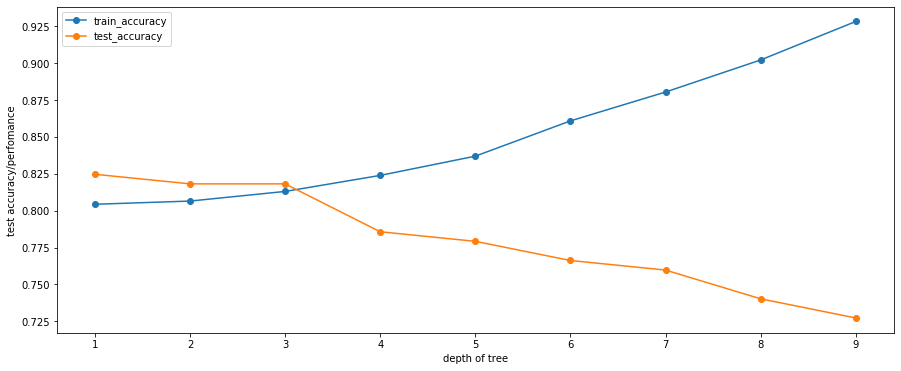

In [126]:
plt.figure(figsize=(15,6))
plt.plot(frame['max_depth'],frame['train_acc'], marker='o', label='train_accuracy')
plt.plot(frame['max_depth'],frame['test_acc'],marker='o', label='test_accuracy')
plt.xlabel('depth of tree')
plt.ylabel('test accuracy/perfomance')
plt.legend()

In [127]:
sample_submission=pd.DataFrame(predict_test,columns=['Loan_Status'],index=lp_test["Loan_ID"])

In [121]:
sample_submission["Loan_Status"]=sample_submission["Loan_Status"].replace({0: 'N'})

In [122]:
sample_submission["Loan_Status"]=sample_submission["Loan_Status"].replace({1: 'Y'})

In [123]:
sample_submission["Loan_Status"].value_counts(normalize=True)

Y    0.836512
N    0.163488
Name: Loan_Status, dtype: float64

In [124]:
sample_submission.to_csv ("/Users/keerthinandan/Documents/loan_prediction/sample_submission2.csv", index = True, header=True)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
dt_modelRF = RandomForestClassifier(max_depth=3,n_estimators=29,n_jobs=2,random_state=10)

In [116]:
dt_modelRF.fit(x_train,y_train)

/Users/keerthinandan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=29, n_jobs=2,
                       oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [117]:
dt_modelRF.score(x_train,y_train)

0.8108695652173913

In [118]:
dt_modelRF.score(x_valid,y_valid)

0.8246753246753247

In [119]:
predict_test=dt_model.predict(data_x_test)

In [105]:
from graphviz import *

In [91]:
from sklearn import tree

In [93]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree1.dot',feature_names=x_train.columns,max_depth=2,filled=True)

In [95]:
from subprocess import check_call

In [ ]:
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

In [103]:
from subprocess import call

In [ ]:
from sklearn.externals.six import StringIO  
import pydotplus 
dotfile = StringIO()  
pydotplus.graph_from_dot_data(tree1.dot.getvalue()).write_png("my_tree.png")

In [ ]:
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree.png', '-Gdpi=600'])